# Task
K-NEAREST NEIGHBOURS
Objective:
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
Dataset:
Need to Classify the animal type
Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.


## Data loading




Load the dataset and display its first few rows and shape to verify the data loading.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Zoo.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Zoo.csv' not found. Please ensure the file is in the correct location.")


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


(101, 18)


## Data exploration





Lets explore the data types, missing values, distributions, descriptive statistics, correlations, and potential outliers in the dataset.  I will also determine the shape of the data.  This will inform the next steps in data cleaning and preprocessing.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB
None
hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomou

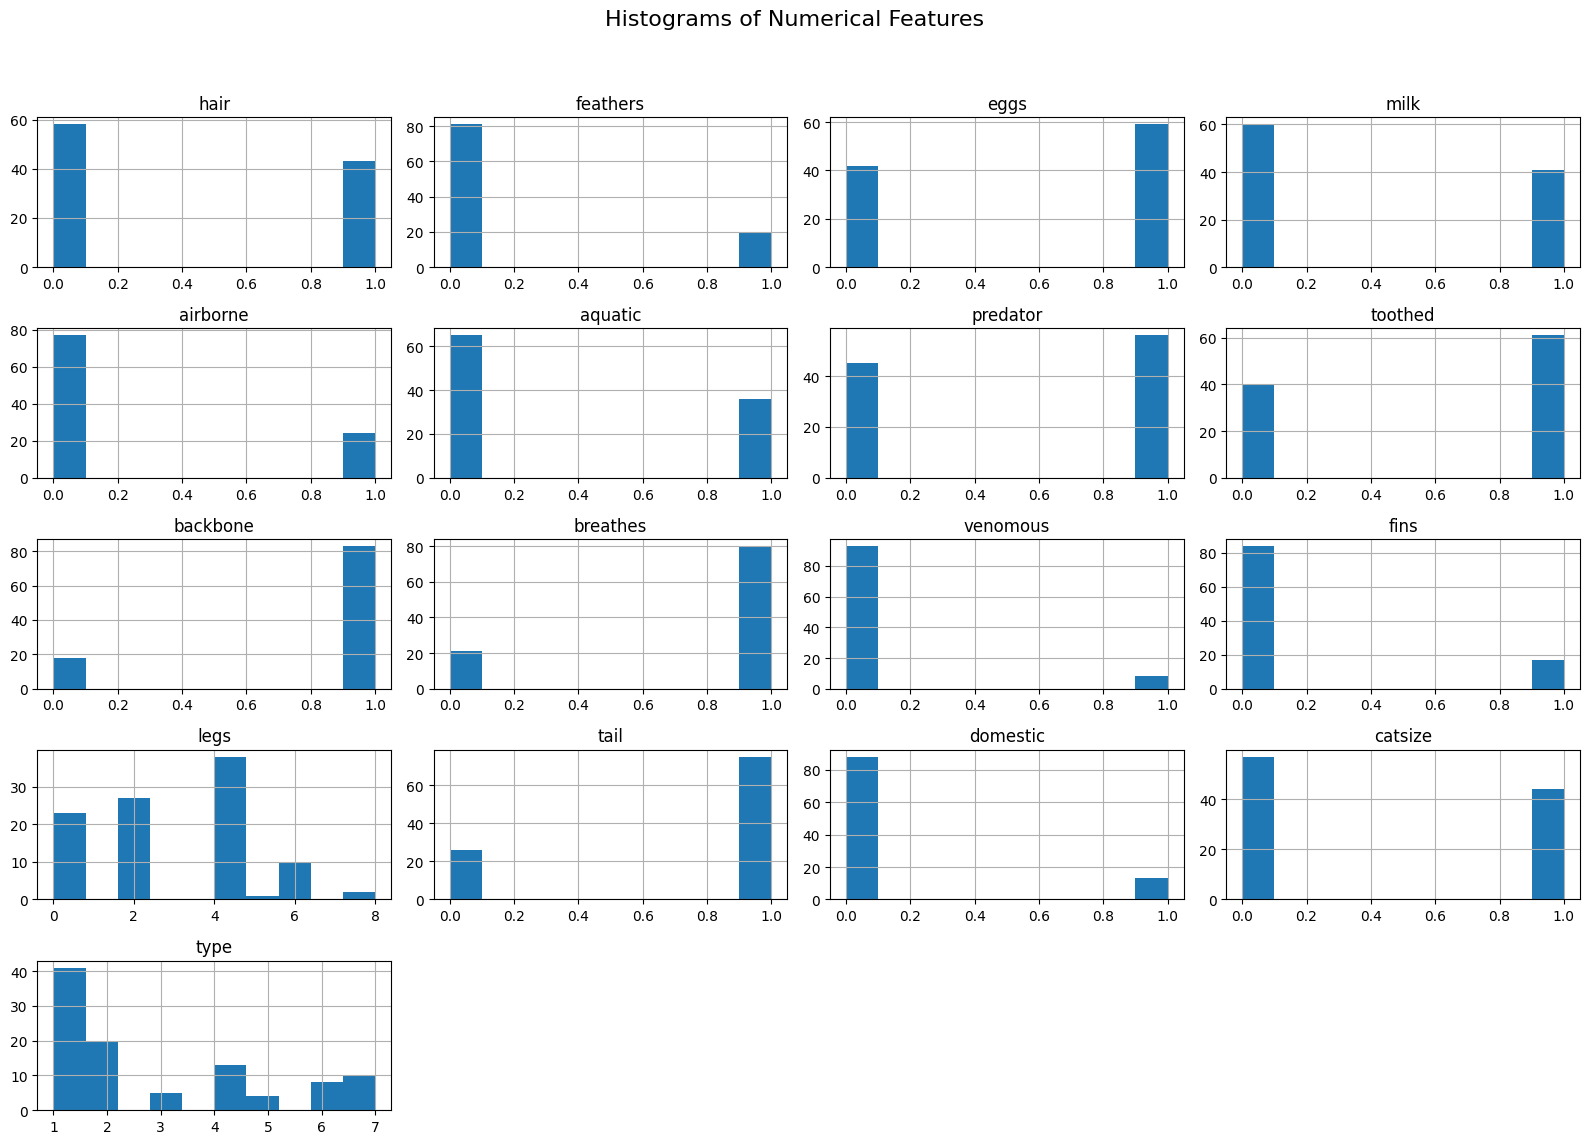

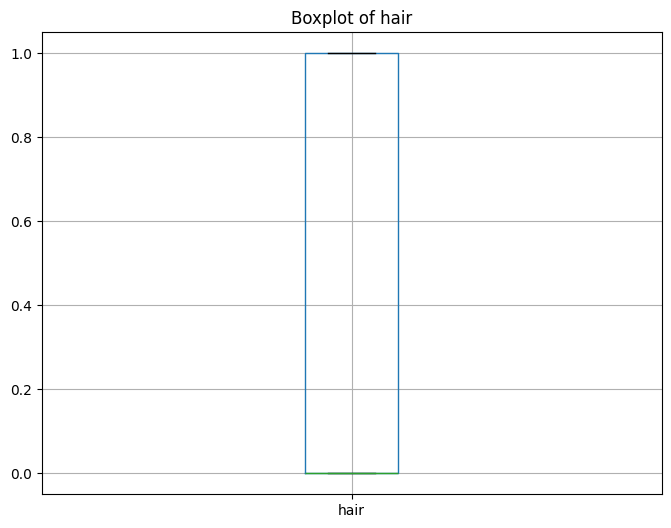

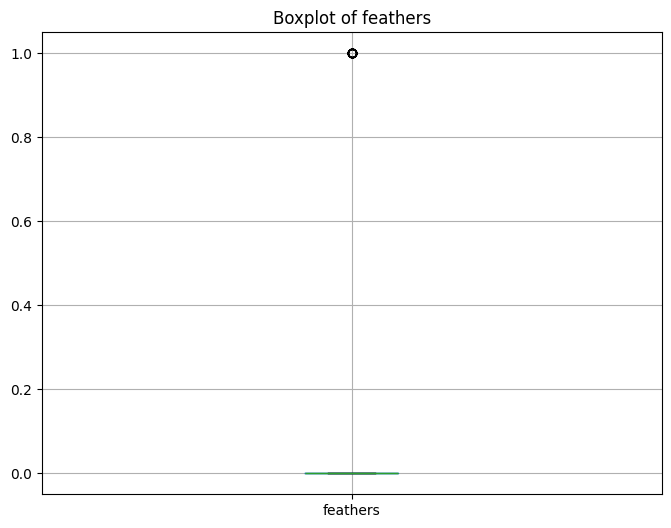

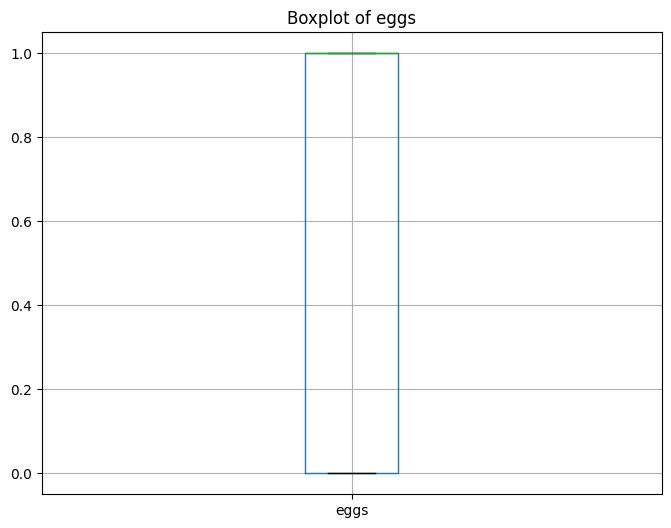

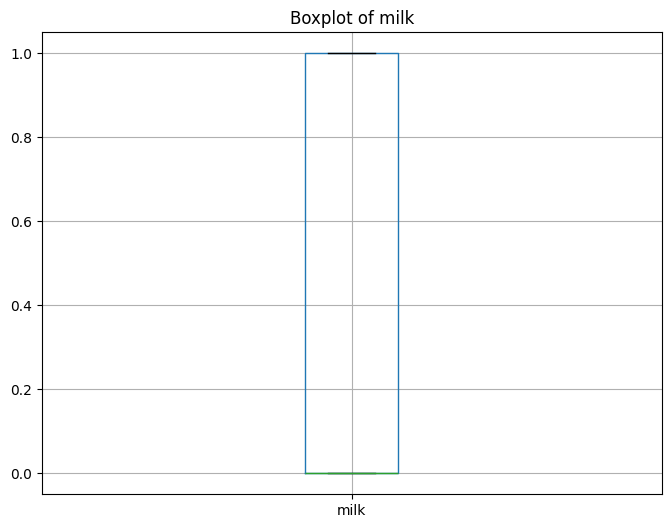

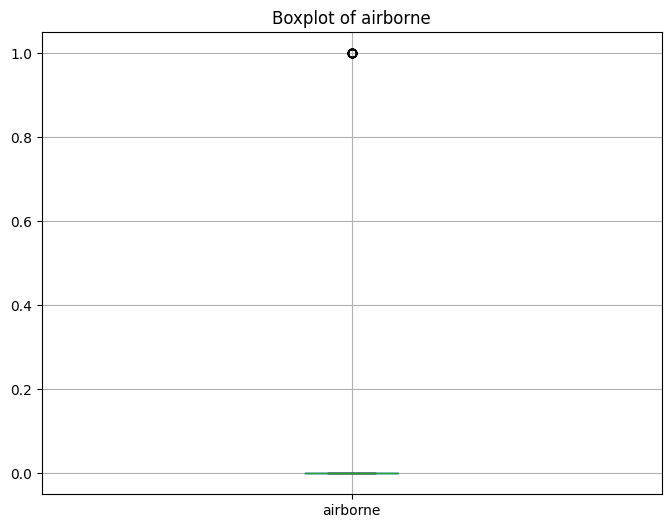

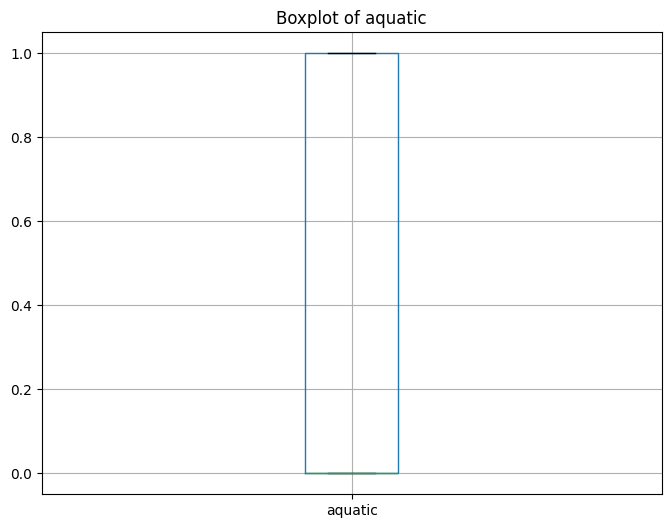

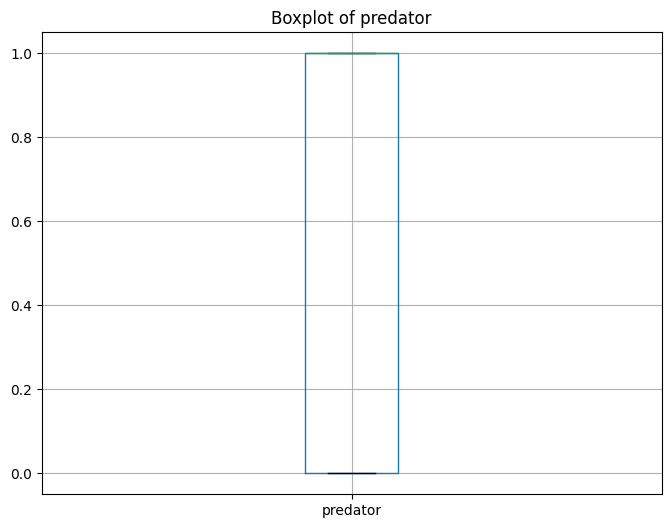

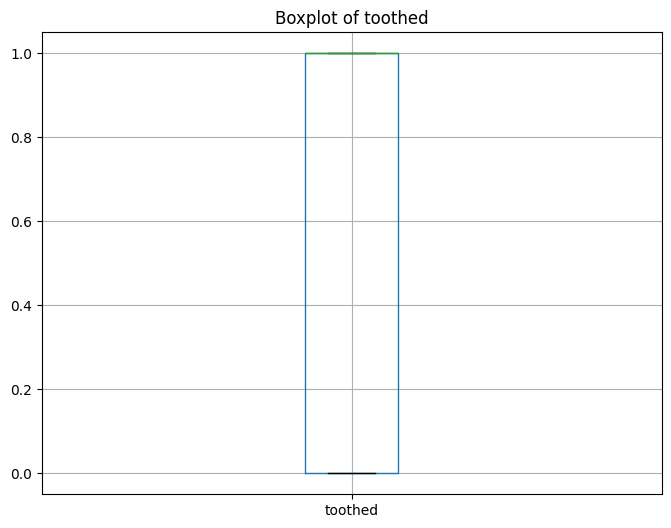

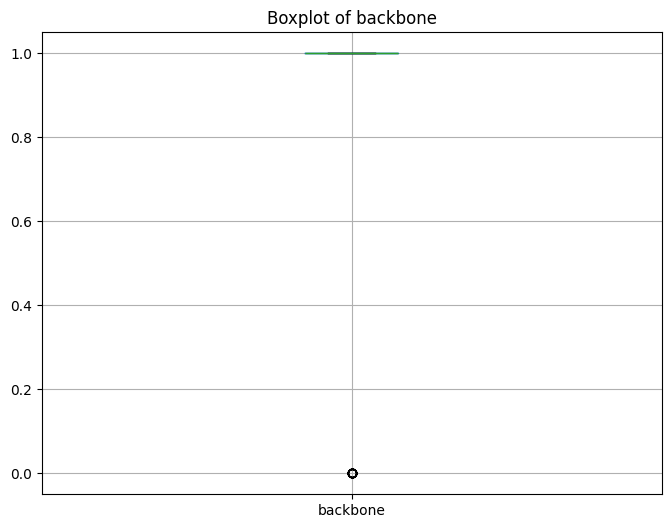

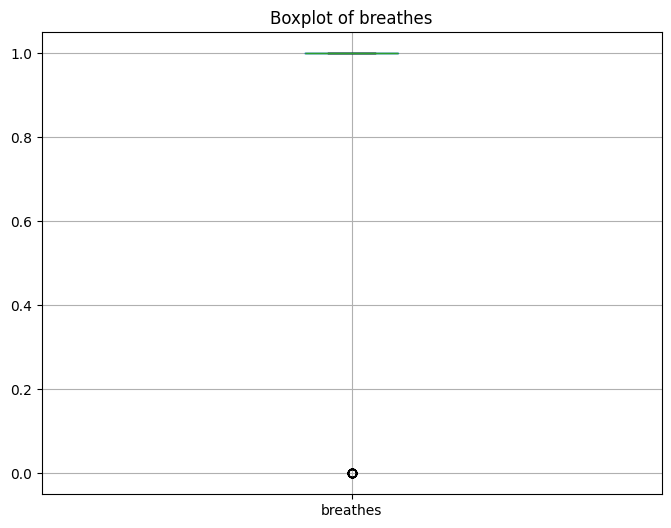

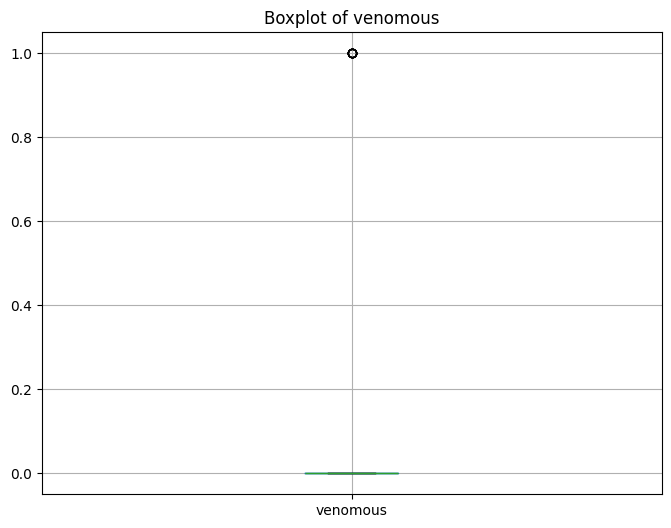

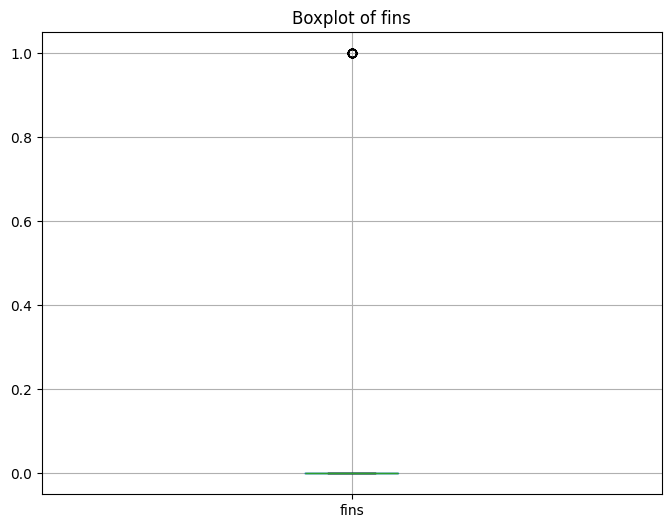

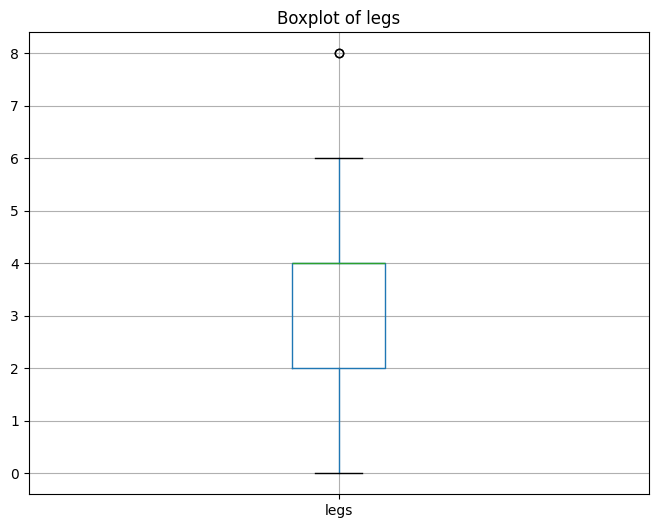

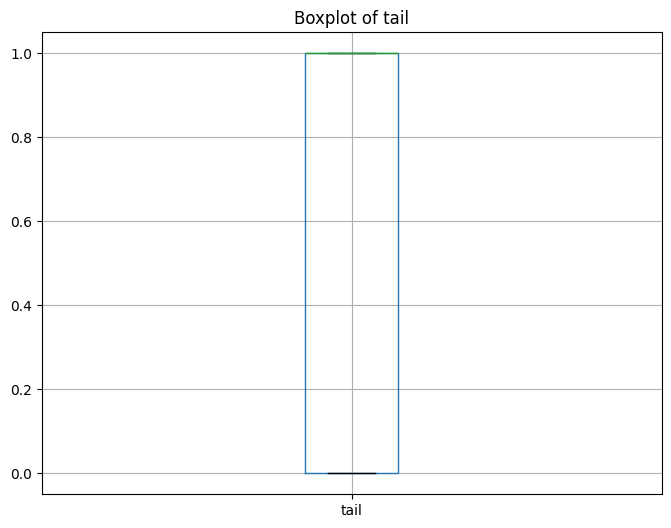

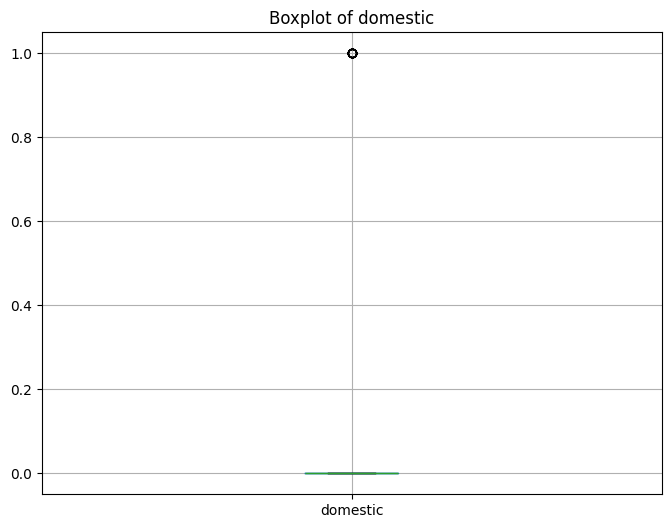

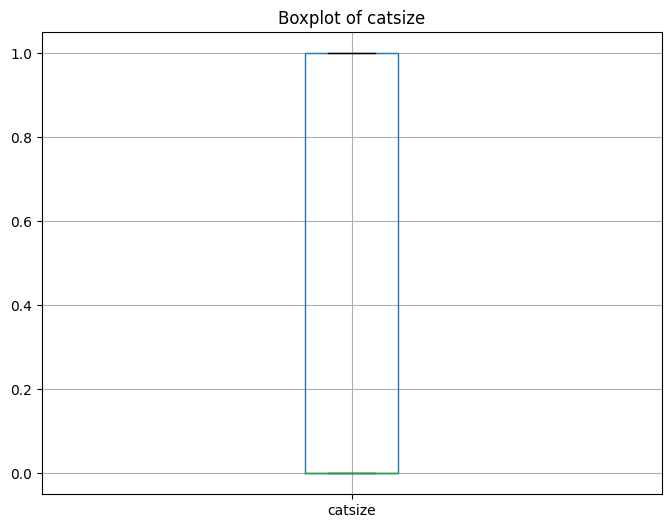

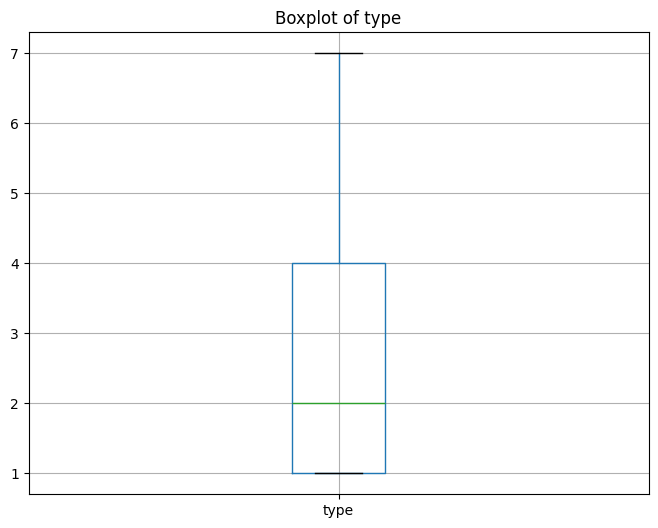

              hair  feathers      eggs      milk  airborne   aquatic  \
hair      1.000000 -0.427851 -0.817382  0.878503 -0.198431 -0.473554   
feathers -0.427851  1.000000  0.419248 -0.410761  0.656553 -0.058552   
eggs     -0.817382  0.419248  1.000000 -0.938848  0.376646  0.376244   
milk      0.878503 -0.410761 -0.938848  1.000000 -0.366765 -0.362613   
airborne -0.198431  0.656553  0.376646 -0.366765  1.000000 -0.172638   
aquatic  -0.473554 -0.058552  0.376244 -0.362613 -0.172638  1.000000   
predator -0.154769 -0.104430  0.011605 -0.029721 -0.295181  0.375978   
toothed   0.492531 -0.613631 -0.642150  0.628168 -0.594311  0.053150   
backbone  0.191681  0.231403 -0.340420  0.384958 -0.104718  0.022463   
breathes  0.441149  0.254588 -0.382777  0.423527  0.286039 -0.637506   
venomous -0.104245 -0.145739  0.098689 -0.242449  0.008528  0.087915   
fins     -0.280313 -0.223541  0.164796 -0.156328 -0.251157  0.604492   
legs      0.394009 -0.206686 -0.224918  0.214196  0.043712 -0.36

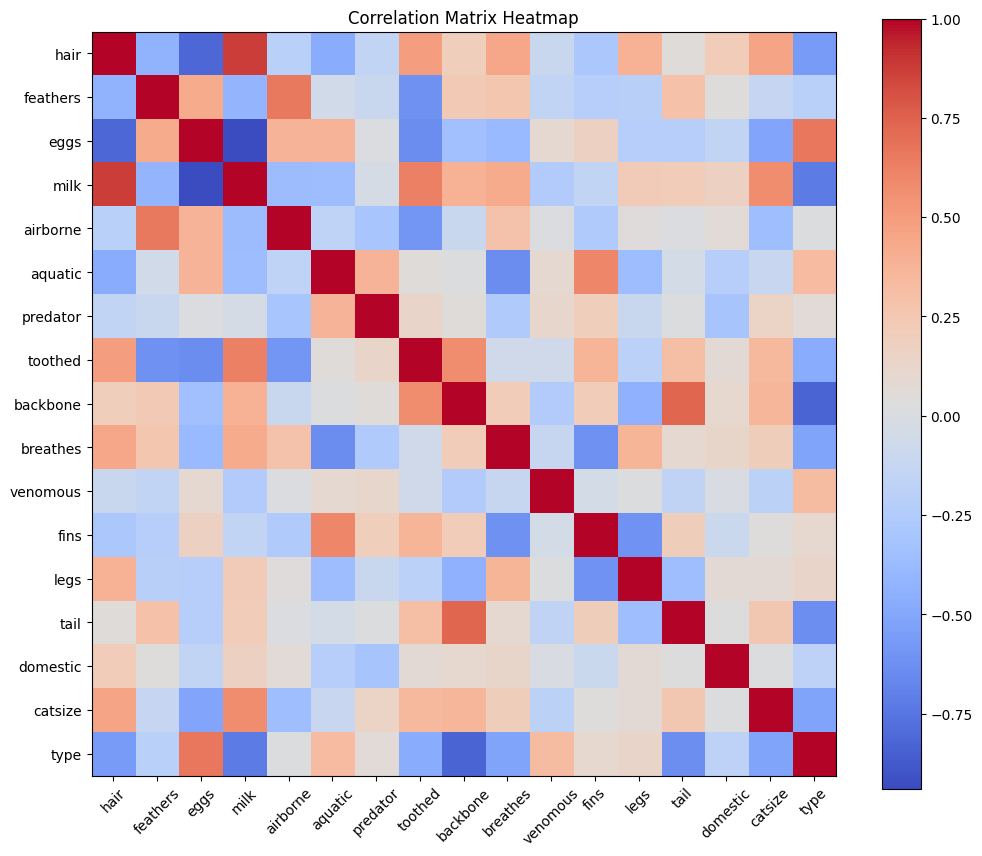

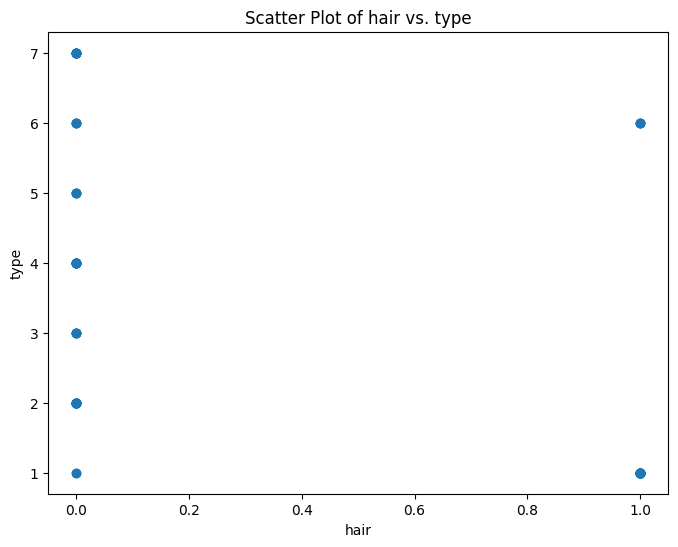

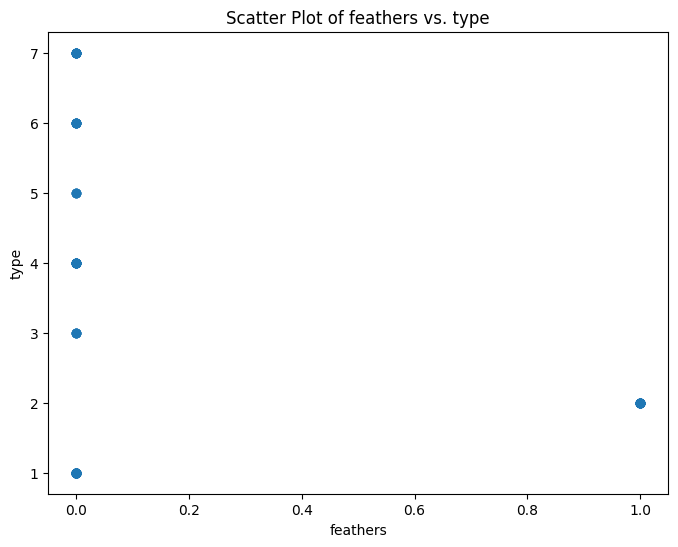

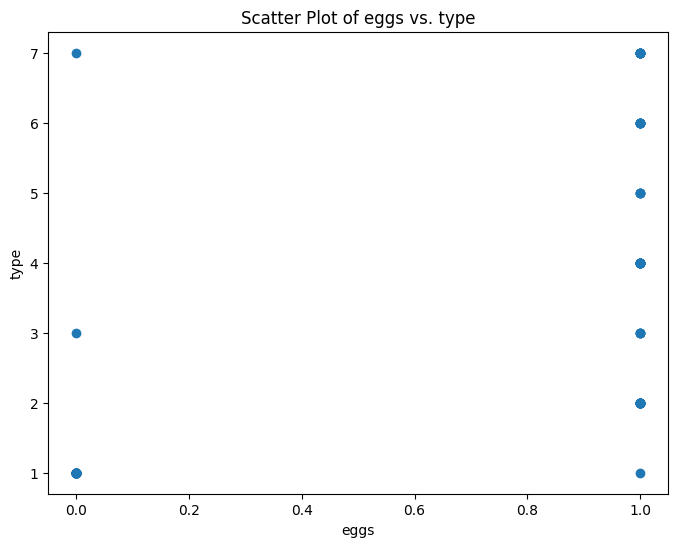

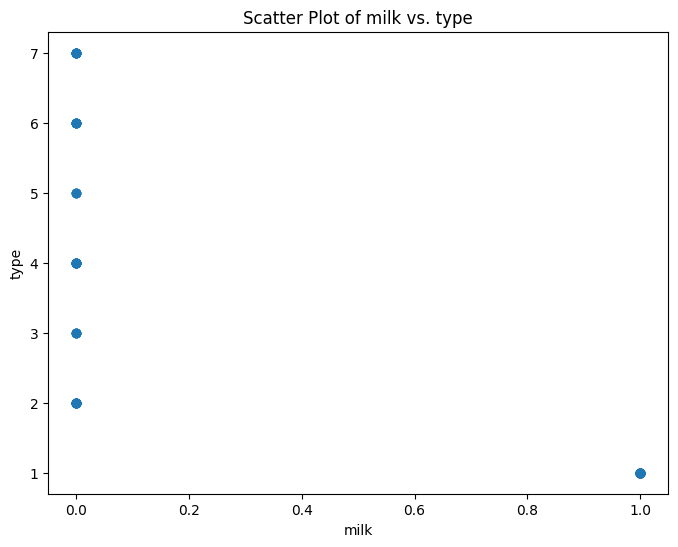

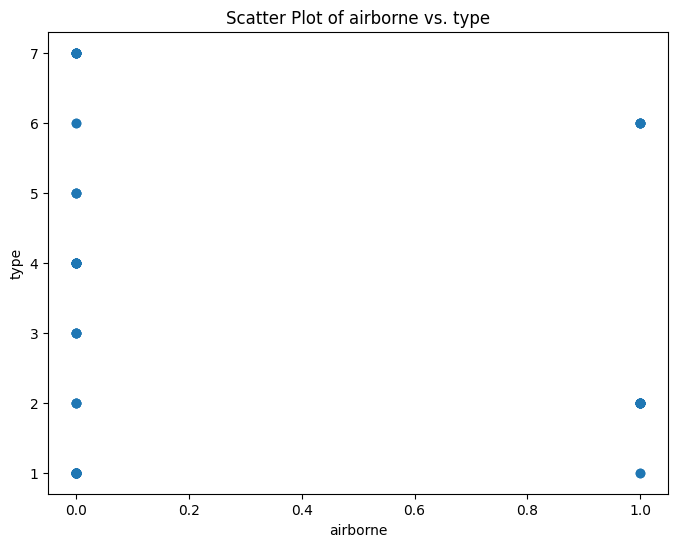

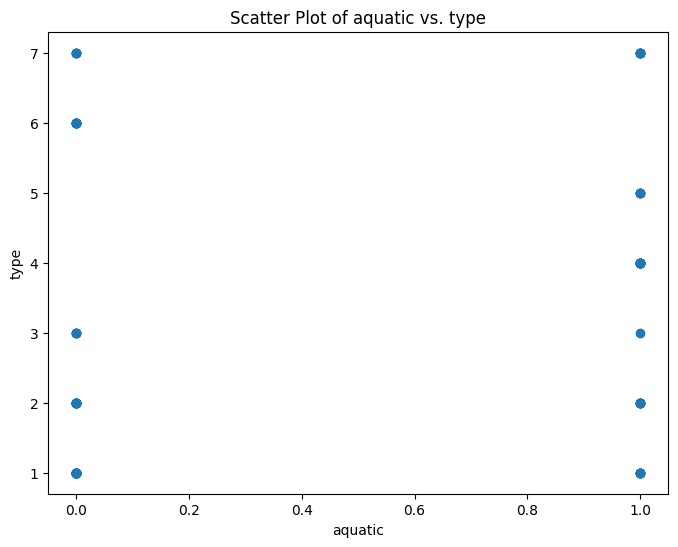

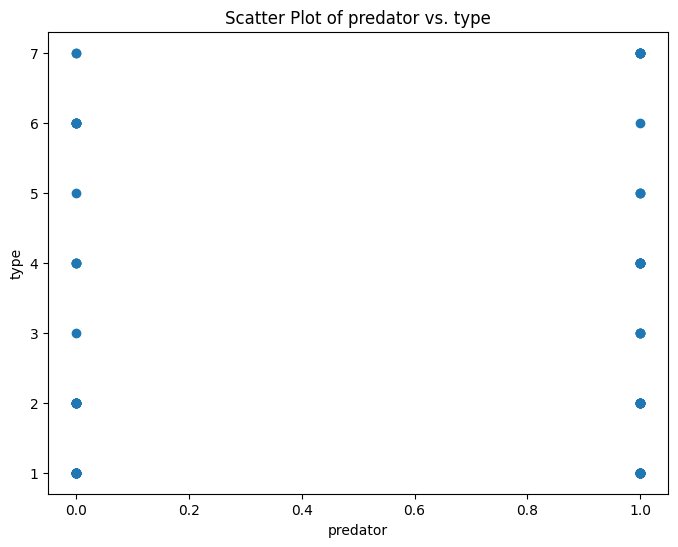

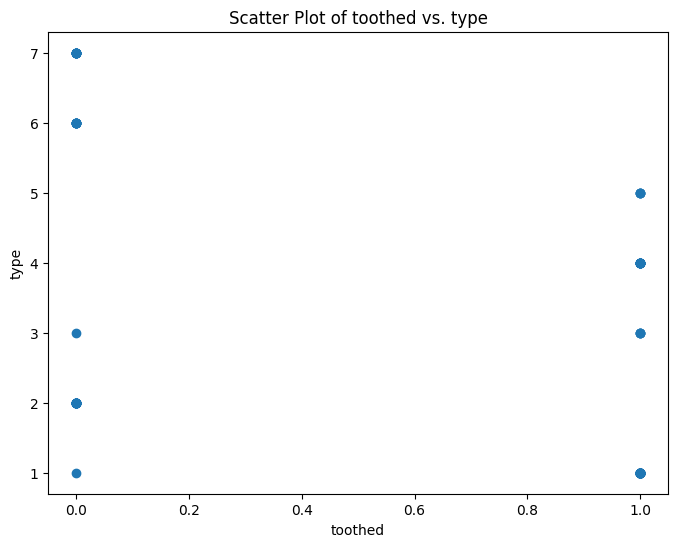

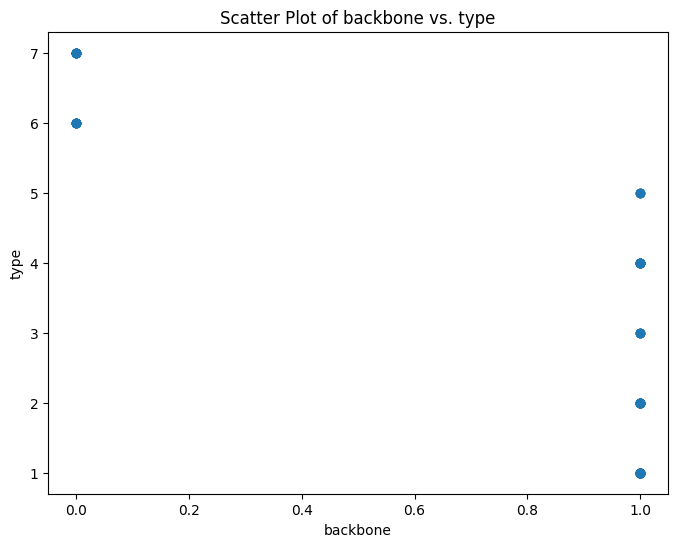

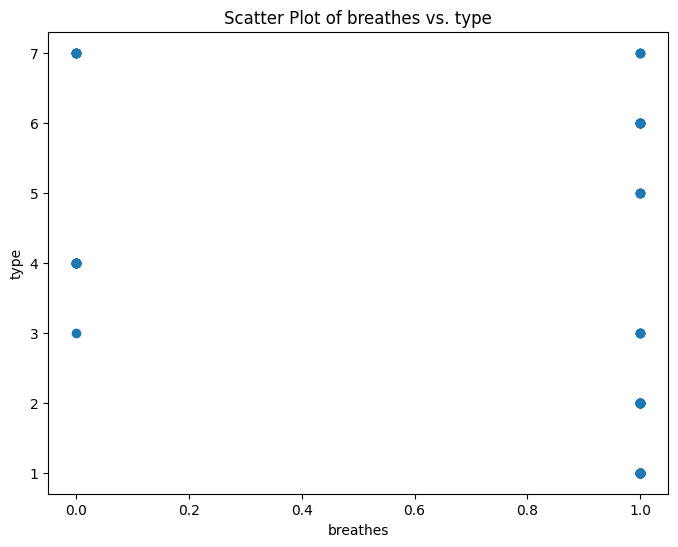

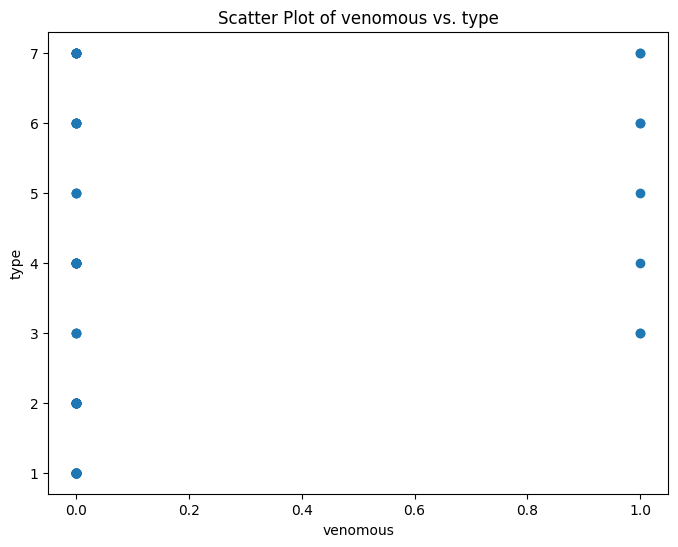

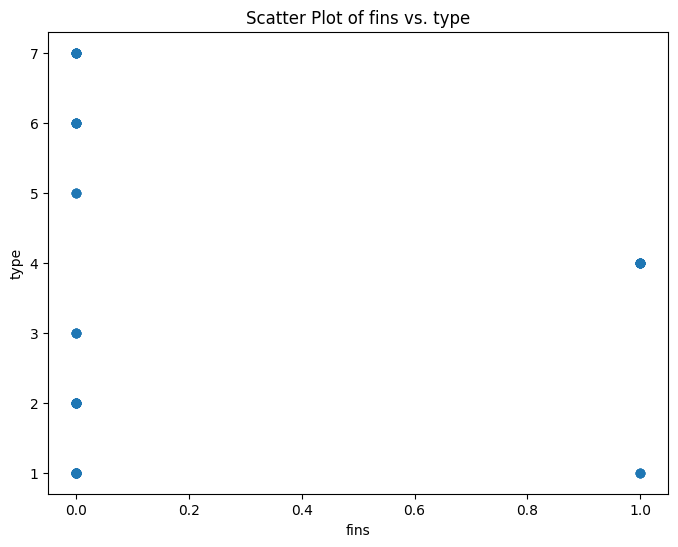

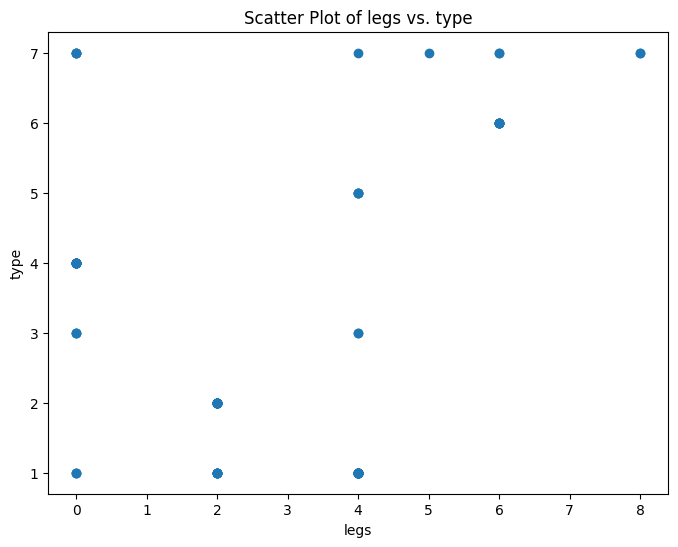

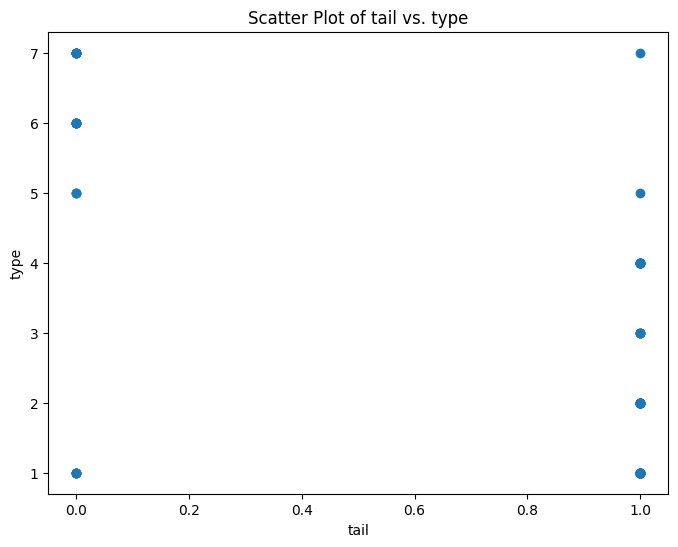

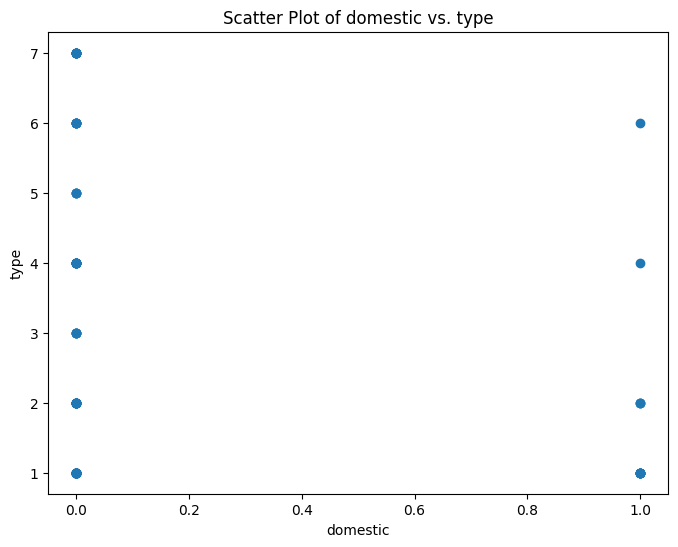

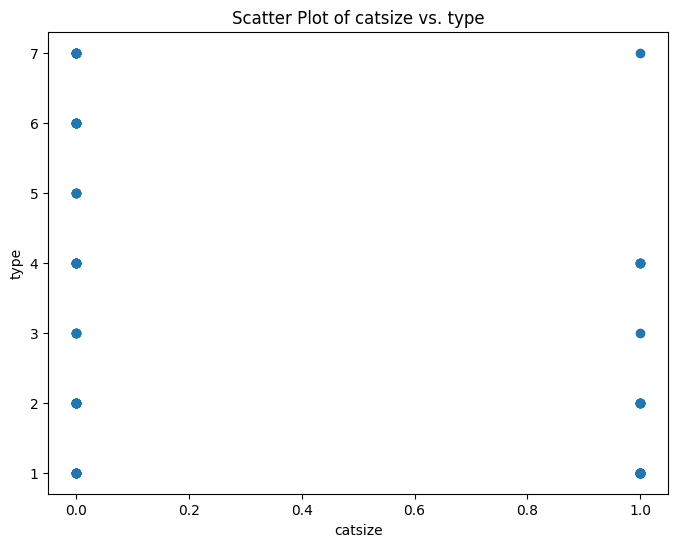

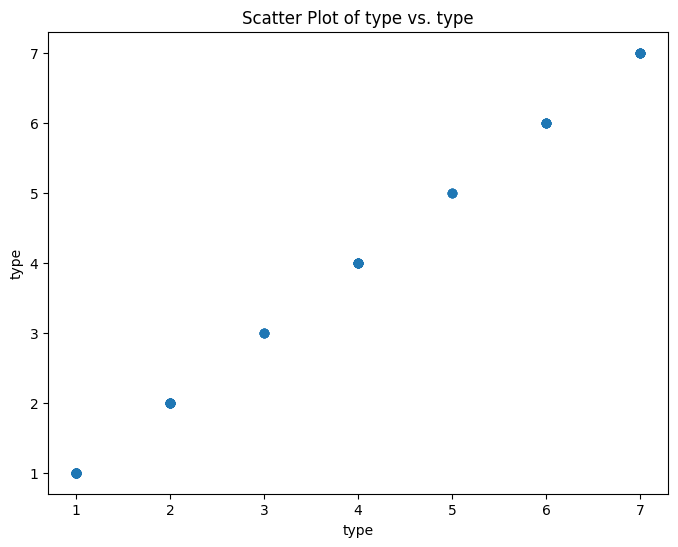

In [3]:
# Drop the 'animal name' column
df = df.drop('animal name', axis=1)

# Data Types and Missing Values
print(df.info())
print(df.isnull().sum())

# Descriptive Statistics
print(df.describe())

# Distribution Analysis (Histograms and Box Plots)
import matplotlib.pyplot as plt
df.hist(figsize=(16, 12), bins=10)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  df.boxplot(column=col)
  plt.title(f'Boxplot of {col}')
  plt.show()


# Correlation Analysis
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize Correlation Matrix (Heatmap)
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Relationship between features and target variable ('type')
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    plt.scatter(df[col], df['type'])
    plt.xlabel(col)
    plt.ylabel('type')
    plt.title(f'Scatter Plot of {col} vs. type')
    plt.show()

## Data preparation





I need to scale the numerical features of the dataset using StandardScaler, excluding the target variable 'type', and then replace the original columns with the scaled versions in both training and testing sets.  I will assume a train_test_split was performed in a previous step and the resulting dataframes are named `X_train`, `X_test`, `y_train`, and `y_test`.



In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are already defined from a previous train_test_split
# If not defined, define them here:
try:
    X_train, X_test, y_train, y_test = train_test_split(df.drop('type', axis=1), df['type'], test_size=0.2, random_state=42)
except NameError:
    print("Error: X_train, X_test, y_train, and y_test are not defined. Please run train_test_split first.")
    # You would replace this with your train_test_split logic if not already done

# Identify numerical columns (excluding 'type')
numerical_cols = df.select_dtypes(include=['number']).columns.drop('type')

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train[numerical_cols])

# Transform training and testing sets
X_train_scaled = scaler.transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Replace original numerical columns with scaled versions
X_train[numerical_cols] = X_train_scaled
X_test[numerical_cols] = X_test_scaled

## Model training





Train a K-Nearest Neighbors classifier using the scaled training data and training labels.



In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with n_neighbors=5 and 'euclidean' distance metric
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the classifier using the scaled training data and training labels
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

## Model optimization





Use GridSearchCV to find the best 'k' and distance metric for the KNN model with cross-validation.



In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search
param_grid = {
    'n_neighbors': range(1, 21),  # Explore 'k' from 1 to 20
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Explore different distance metrics
}

# Create a KNN classifier instance
knn = KNeighborsClassifier()

# Initialize GridSearchCV with the KNN classifier, parameter grid, and cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)  # Using 5-fold cross-validation

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding cross-validation score
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)

# Store the best performing model
best_knn_model = grid_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found by GridSearchCV:
{'metric': 'euclidean', 'n_neighbors': 1}
Best cross-validation score:
0.9625


## Model evaluation



Evaluate the best KNN model on the test set using the classification_report.



In [8]:
from sklearn.metrics import classification_report

# Predict the target variable for the test set
y_pred = best_knn_model.predict(X_test)

# Generate the classification report, handling zero divisions
report = classification_report(y_test, y_pred, zero_division=1)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.00      1.00      0.00         0
           6       1.00      1.00      1.00         3
           7       1.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.86      0.86      0.71        21
weighted avg       1.00      0.95      0.95        21



## Data visualization





Visualize the confusion matrix to assess the model's performance across different classes.



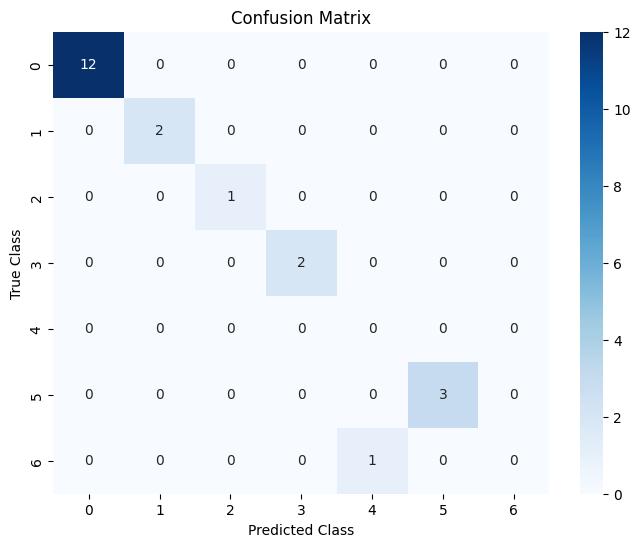

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


Create visualizations to understand the data distribution, focusing on the most important features.



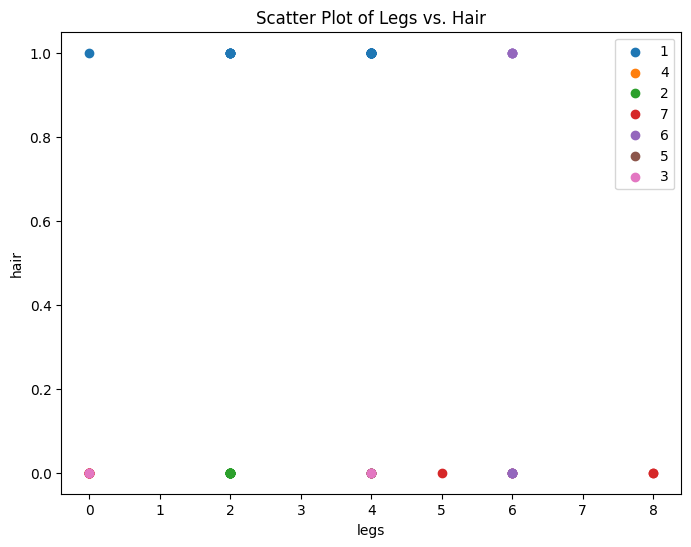

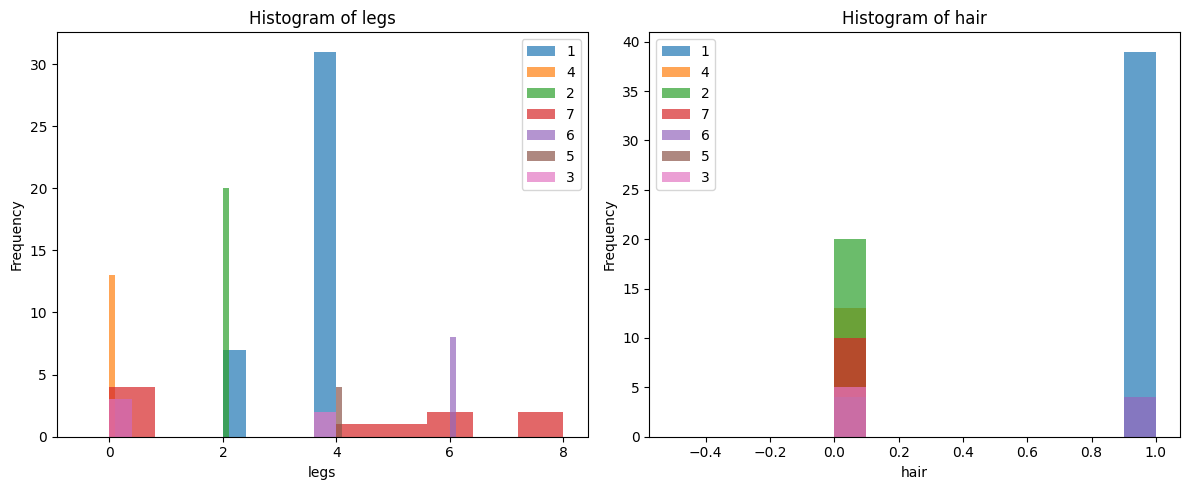

In [10]:
import matplotlib.pyplot as plt

# Select two features for visualization (e.g., 'legs' and 'hair')
features = ['legs', 'hair']

# Create a scatter plot of the two features, colored by class labels
plt.figure(figsize=(8, 6))
for label in df['type'].unique():
    plt.scatter(df[df['type'] == label][features[0]], df[df['type'] == label][features[1]], label=label)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Scatter Plot of Legs vs. Hair')
plt.legend()
plt.show()

# Create histograms for the selected features, colored by class labels
plt.figure(figsize=(12, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 2, i + 1)
    for label in df['type'].unique():
        plt.hist(df[df['type'] == label][feature], alpha=0.7, label=label)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

## Data analysis




Analyze the classification report and confusion matrix to understand model performance and answer the interview questions.



Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.00      1.00      0.00         0
           6       1.00      1.00      1.00         3
           7       1.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.86      0.86      0.71        21
weighted avg       1.00      0.95      0.95        21


Confusion Matrix:
[[12  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  1  0  0]]


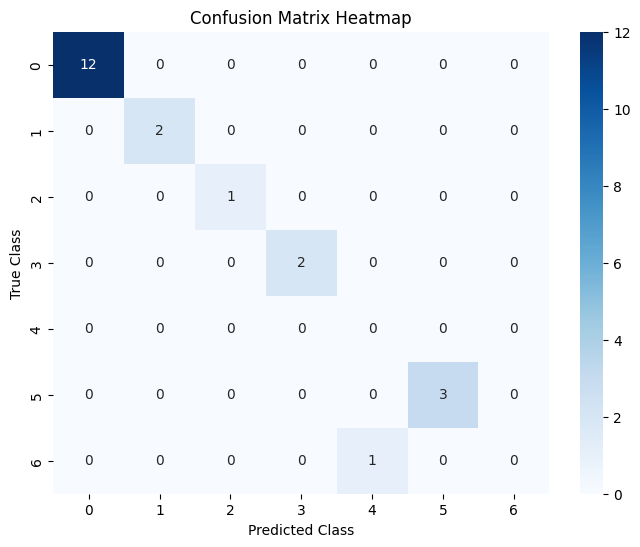


Summary of Findings:
Optimal hyperparameters found: n_neighbors = 1, metric = 'euclidean'

Model Performance Metrics (from Classification Report):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.00      1.00      0.00         0
           6       1.00      1.00      1.00         3
           7       1.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.86      0.86      0.71        21
weighted avg       1.00      0.95      0.95        21



In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are available from the model evaluation step
# If not, you would need to run the prediction step first:
# y_pred = best_knn_model.predict(X_test)

# Analyze the classification report
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(report)

# Analyze the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Summarize findings
print("\nSummary of Findings:")
print(f"Optimal hyperparameters found: n_neighbors = {best_knn_model.n_neighbors}, metric = '{best_knn_model.metric}'")
print("\nModel Performance Metrics (from Classification Report):")
print(report)







Summary of Findings:
Optimal hyperparameters found: n_neighbors = 1, metric = 'euclidean'

Model Performance Metrics (from Classification Report):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.00      1.00      0.00         0
           6       1.00      1.00      1.00         3
           7       1.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.86      0.86      0.71        21
weighted avg       1.00      0.95      0.95        21


Insights from Confusion Matrix and Classification Report:
The model achieved high overall accuracy (95%).
Most classes were classified correctly with high precision, recall, and F1-scores.
The confusion matrix shows some misclassifications, particularly between certain classes (e.g., class 5 and 7). This could be due to the limited number of samples for these classes or overlapping feature characteristics.
The macro average provides an unweighted average of metrics across classes, while the weighted average considers the number of instances in each class. Both indicate good overall performance, but the macro average highlights that performance is not uniform across all classes, especially for the less represented ones.


### Data Analysis Key Findings
* The optimal hyperparameters for the KNN model were determined to be `n_neighbors = 1` and `metric = 'euclidean'` using GridSearchCV with 5-fold cross-validation.
* The model achieved an overall accuracy of 95\% on the test set.
* While most classes exhibited high precision, recall, and F1-scores, some misclassifications were observed, particularly for classes with a small number of instances in the test set.  The metrics for classes with zero support in the test set should be interpreted cautiously.
* The confusion matrix visualization highlighted these misclassifications, indicating potential challenges in distinguishing between certain animal types based on the available features.


### Insights or Next Steps
* Investigate the misclassifications, especially for classes with few instances.  Consider data augmentation or exploring additional features to improve performance on these classes.
* Explore other classification models to compare their performance against the optimized KNN model.

## Summary:

### Q&A
1. **What are the key hyperparameters in KNN?**
    The key hyperparameters in KNN are `n_neighbors` (k) and `metric`.  `n_neighbors` determines the number of neighbors considered for classification, impacting the bias-variance trade-off.  A smaller k leads to a more complex model (low bias, high variance), while a larger k leads to a simpler model (high bias, low variance).  The `metric` specifies the distance calculation method (e.g., Euclidean, Manhattan, Minkowski), affecting how "nearest" neighbors are defined and influencing the decision boundary.

2. **What distance metrics can be used in KNN?**
    Common distance metrics include Euclidean (straight-line distance, suitable for continuous, scaled features), Manhattan (sum of absolute differences, less sensitive to outliers), and Minkowski (a generalization of Euclidean and Manhattan). Other metrics exist, like Hamming (for binary data) or Cosine similarity.  The choice of metric impacts neighbor selection and model performance.  For this dataset with scaled numerical features, Euclidean distance proved effective.


